In [6]:
import subprocess
 
arg  = ["ls"] + ["-l"]
print(arg)
subprocess.call(["ls", "-l"])
subprocess.call(["tree"])
subprocess.call(arg)
subprocess.call('ls', shell=True, cwd='/home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/')

['ls', '-l']
total 40
-rw-rw-r-- 1 jctuesta jctuesta 37731 апр 25 00:00 test.ipynb
.
└── test.ipynb

0 directories, 1 file
total 40
-rw-rw-r-- 1 jctuesta jctuesta 37731 апр 25 00:00 test.ipynb
brute_force.cpp
brute_force.h
dp.cpp
dp.h
generator.cpp
generator.h
input
LC.cpp
LC.h
main.cpp
out


0

In [7]:
subprocess.call(["cat", "/home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/dp.cpp"])

//Dinamic Programic method
#include "dp.h"
int dinamic_programing(int W, std::vector<int>& wt, std::vector<int>& profit, int n) {
    std::vector<int> dp (W + 1, 0);

    for (int i = 1; i < n + 1; ++i) {
        for (int w = W; w >= 0; --w) {

            if (wt[i - 1] <= w)
                // finding the maximum profit
                dp[w] = std::max(dp[w],
                                 dp[w - wt[i - 1]] + profit[i - 1]);
        }
    }
    return dp[W]; // returning the maximum profit of knapsack
}


0

In [8]:
subprocess.call(["cat", "/home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/brute_force.cpp"])

//Intene serching method
#include "brute_force.h"
int brute_force (int capacity, std::vector<int> &weight, std::vector<int> &profit) {

    size_t bit_w = 1;
    size_t sum_w = 0;
    size_t profit_tmp = 0;
    size_t profit_max = 0;

    for (size_t i = 1; i < (bit_w << profit.size()); i++) {
        //	std::cout  <<"---------" <<std::bitset<4>(i) << std::endl;
        for (size_t j = 0; j < profit.size(); ++j) {
            //std::cout << std::bitset<4>(1<<j) <<" --j--";
            if (i & (bit_w << j) ) { //j is part of
                sum_w += weight[j];
                profit_tmp += profit[j];
            }
            //std::cout << std::endl;
            //std::cout << "-sum_i-: " << sum_w << "-- profit : " << profit_tmp  << std::endl;
        }
        if (profit_max <= profit_tmp && sum_w <= capacity) {
            profit_max = profit_tmp;
            //set solution (1<<i)
        }
        profit_tmp = 0;
        sum_w = 0;
    }
    return profit_max;
}

0

In [9]:
import os

#def Cpp_Execution():
    # creating a pipe to child process
    #data, temp = os.pipe()
    # writing inputs to stdin and using utf-8 to convert it to byte string
    #os.write(temp, bytes("7 12\n", "utf-8"));
    #os.close(temp)
    # storing output as a byte string
    #s = subprocess.check_output("g++ /home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/main.cpp -o out;./out", stdin = data, shell = True)

    #s = subprocess.check_output("g++ /home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/main.cpp -o out;./out", shell = True)

    # decoding to print a normal output

    #print(s.decode("utf-8"))
    #Cpp_Execution()

In [10]:
import subprocess


str(' '.join(arg))
s = subprocess.check_output("g++ main.cpp LC.cpp LC.h brute_force.cpp brute_force.h dp.cpp dp.h generator.cpp generator.h -o out;./out" , shell = True, cwd='/home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/')

a = list(s.decode("utf-8").split())
a = [int(x) for x in a]
print(a)

[3691, 9116, 76492, 6491, 4912, 53725, 14529, 5613, 69064, 43568, 9963, 139214, 83516, 11152, 221368, 188470, 11355, 255323, 414852, 11461, 510370, 658776, 12197, 809357, 1381011, 13993, 1475027, 3039840, 10442, 3103619]


In [16]:
print(a)
rng = [x for x in range(5,15)]
bf = a[0::3]
dp = a[1::3]
lc = a[2::3]


[3691, 9116, 76492, 6491, 4912, 53725, 14529, 5613, 69064, 43568, 9963, 139214, 83516, 11152, 221368, 188470, 11355, 255323, 414852, 11461, 510370, 658776, 12197, 809357, 1381011, 13993, 1475027, 3039840, 10442, 3103619]


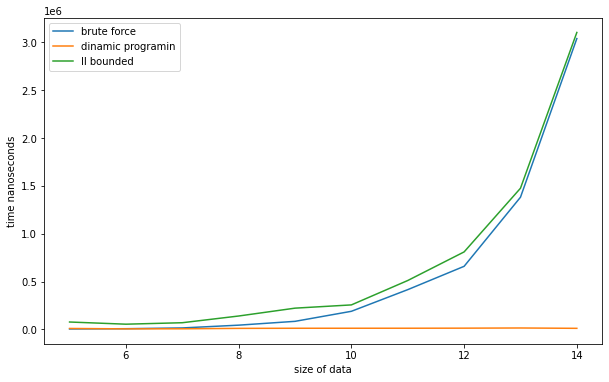

In [19]:
import matplotlib.pyplot as plt
plt.plot(rng, bf, label = "brute force")
plt.plot(rng, dp, label = "dinamic programin")
plt.plot(rng, lc, label = "ll bounded ")
plt.xlabel('size of data')
plt.ylabel('time nanoseconds')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)
plt.show()



    FIN